<a href="https://colab.research.google.com/github/chaewoncutie/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [928]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


## B. Load and understand the dataset

In [929]:
# put your answer here
import pandas as pd
df = pd.read_excel("personalidad.xlsx")
df

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,No. of friends/followers,Personality
0,Sly,0,1,0,1174,0
1,Michaela,0,1,0,663,0
2,Mark,0,1,0,409,0
3,Marcelino,0,1,0,962,0
4,Tehrence,0,1,0,917,0
5,James,1,1,1,4677,0
6,Rodney,0,1,0,5134,0
7,Christian,1,1,1,4139,1
8,Sonya,0,1,0,892,0
9,Blix,0,1,0,721,0


1. Display the summary of all the features of the dataset using `.info()`

In [930]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      50 non-null     object
 1   Post/Share Frequently?    50 non-null     int64 
 2   Active in social media?   50 non-null     int64 
 3   Replies to comments?      50 non-null     int64 
 4   No. of friends/followers  50 non-null     int64 
 5   Personality               50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [931]:
# put your answer here
df['Personality'].value_counts()

,count
Personality,
0,34
1,16


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [932]:
X = df.drop(['Name','Personality'], axis=1).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [933]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [934]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [935]:
# put your answer here

knn = KNeighborsClassifier(n_neighbors=15)


7. Train the model using the `.fit()`

In [936]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)




8. Test the model using the `.predict()`

In [937]:
# put your answer here
knn.predict([[0,1,0,1000]])

array([0])

## Evaluate the model

9. Create a confusion matrix

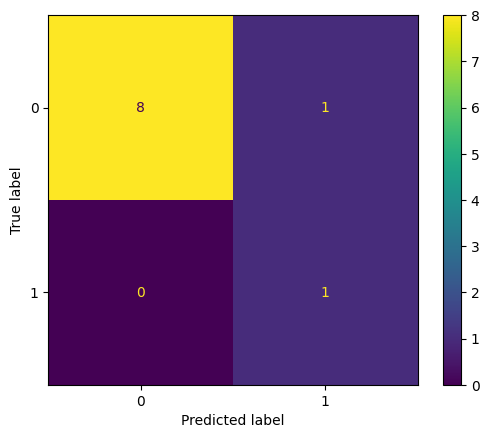

In [938]:
# put your answer here
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [939]:
# put your answer here

metrics.accuracy_score(y_test, y_pred)

0.9

11. Display the precision

In [940]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.88888889 1.        ]


12. Display the recall

In [941]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.  0.5]


13. Display the f1-score

In [942]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.94117647 0.66666667]


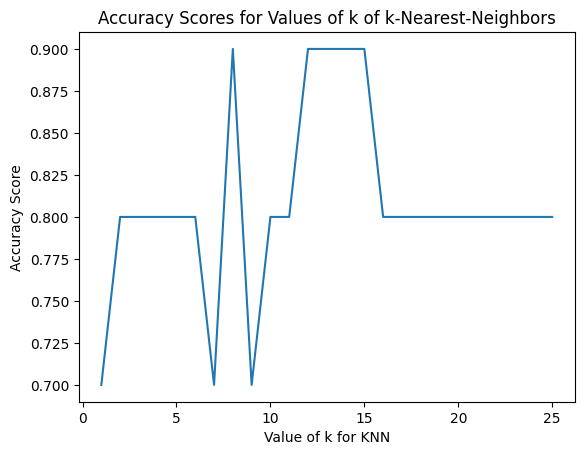

In [943]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()